## Calculations

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
from uncertainties import ufloat
from uncertainties.umath import *

#### 1

In [126]:
l_r = ufloat(.00895, .00005)
d_r = ufloat(.60041, .00005)
m_r = ufloat(.10030, .00005)
l_d = ufloat(.01643, .00005)
d_d = ufloat(.10170, .00005)
m_d = ufloat(1.0268, .00005)
M = m_r + m_d

In [127]:
l_p = ufloat(.58221, .00005)
hole = ufloat(.00845, .00005)

In [128]:
cm_r = d_r/2 - hole
cm_d = l_p + l_d/2
g = 9.81
cm = (m_r*cm_r + m_d*cm_d)/(m_r + m_d)

#### 2

In [129]:
T = 2*np.pi*(cm/g)**(1/2)
print("Estimated period =", T, "sec")

Estimated period = 1.50635+/-0.00007 sec


#### 3

In [130]:
per_10 = np.array([1.35, 1.28, 1.32, 1.31, 1.41, 1.31, 1.43, 1.41, 1.41, 1.41])
per_avg = np.mean(per_10)
print("Average period =", per_avg, "sec")

Average period = 1.364 sec


#### 4

In [131]:
g_exp = 4*np.pi**2*cm/per_avg**2
print("g prediction =", g_exp, "m/s^2")

g prediction = 11.9644+/-0.0011 m/s^2


This value of g makes sense and is on the right order of magnitude.

#### 5

In [132]:
I_r = (1/4)*m_r*(d_r)**2 + (1/12)*m_r*l_r**2 + m_r*cm_r**2
I_d = (1/4)*m_d*(d_d)**2 + (1/12)*m_d*l_d**2 + m_d*cm_d**2
I = I_r + I_d

In [133]:
print("Moment of Inertia for Rod =", I_r, "kg m^2")
print("Moment of Inertia for Disk =", I_d, "kg m^2")
print("")
print("Total Moment of Inertia =", I, "kg m^2")

Moment of Inertia for Rod = 0.017578+/-0.000010 kg m^2
Moment of Inertia for Disk = 0.36062+/-0.00007 kg m^2

Total Moment of Inertia = 0.37820+/-0.00007 kg m^2


#### 6

In [134]:
#data is organized as [angle, avg period]
#acg period was calculated by timing 20 oscillations and dividing by 20
per_20 = np.array([[5, 1.516], [10, 1.538], [30, 1.557], [50, 1.601]])

The small angle approximation started to become inaccurate after $5^\circ$ since the period grows substantially.

#### 7

In [135]:
L = 0.772
R = 6371
w = 2*np.pi/(3600*24)

In [136]:
a_cen = w**2*R*np.cos(L)**2

In [137]:
T_2 = 2*np.pi*(cm/(g+a_cen))**(1/2)
T_diff = abs(T_2 - T) # difference between period calculations with and without centripetal acceleration

In [138]:
print("The uncertainty would have to be equal or smaller than", T_diff.nominal_value)

The uncertainty would have to be equal or smaller than 1.3280641455448716e-06


#### 8
The encoder is set to 2000 ticks per rev. This makes the output in $0.18^\circ/tick$ 

#### 9
dropped from $10^\circ$

left-right wobble decreases substantially after a few seconds. Data was taken after the path of the pendulum was stable.

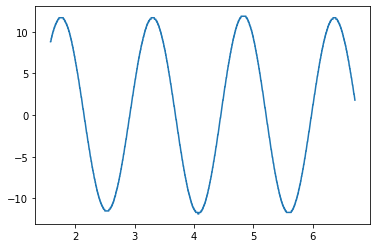

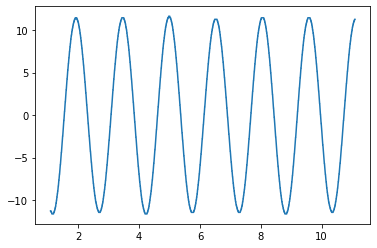

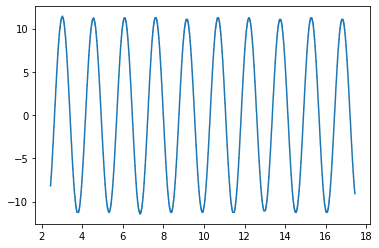

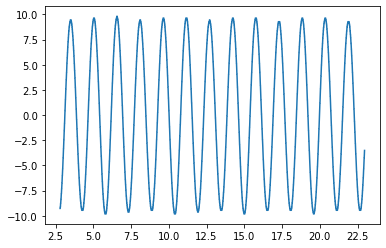

In [139]:
#open data from testdata1.csv
data = np.genfromtxt('testdata1.csv', delimiter=',')
times = data[:,0]
angles = data[:,1]*0.18
maxangle  = np.max(angles)
minangle = np.min(angles)
mid = (maxangle + minangle)/2
angles = angles - mid
plt.plot(times, angles)
plt.show()

data2 = np.genfromtxt('testdata2.csv', delimiter=',')
times2 = data2[:,0]
angles2 = data2[:,1]*0.18
maxangle2  = np.max(angles2)
minangle2 = np.min(angles2)
mid2 = (maxangle2 + minangle2)/2
angles2 = angles2 - mid2
plt.plot(times2, angles2)
plt.show()

data3 = np.genfromtxt('testdata3.csv', delimiter=',')
times3 = data3[:,0]
angles3 = data3[:,1]*0.18
maxangle3  = np.max(angles3)
minangle3 = np.min(angles3)
mid3 = (maxangle3 + minangle3)/2
angles3 = angles3 - mid3
plt.plot(times3, angles3)
plt.show()

data4 = np.genfromtxt('testdata4.csv', delimiter=',')
times4 = data4[:,0]
angles4 = data4[:,1]*0.18
maxangle4  = np.max(angles4)
minangle4 = np.min(angles4)
mid4 = (maxangle4 + minangle4)/2
angles4 = angles4 - mid4
plt.plot(times4, angles4)
plt.show()


The period is about 1.5 seconds (from looking at it) which lines up with previous measurements. All data sets appear to be a sine wave with slight fluctuations in total amplitude. The amplitude goes up and down which violates the model of exponential decay.

y =  11.741940254485822 *sin( 4.098724145036078 *t +  0.6020896034519397 )*exp(-t/ 715370911.2457321 ) +  0.01264629392967806
chi squared = 2974.1068710107393
adjusted chi squared = 1.8883218228639613


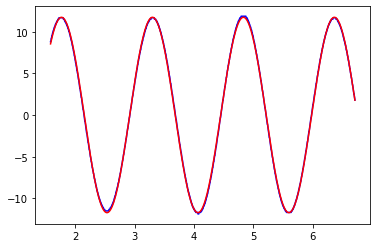

In [140]:
from scipy.optimize import curve_fit
def fitfunc(t, A, w, phi, Tdamp, C):
    return A*np.sin(w*t + phi)*np.exp(-t/Tdamp) + C

popt, pcov = curve_fit(fitfunc, times, angles, p0=[12, 2*np.pi/1.5, 0, 0.1, 0])
plt.plot(times, angles, 'b-', label='data')
plt.plot(times, fitfunc(times, *popt), 'r-', label='fit')
#print the eqn
print("y = ", popt[0], "*sin(", popt[1], "*t + ", popt[2], ")*exp(-t/", popt[3], ") + ", popt[4])
#calculate chi squared and adjusted chi squared
chi2 = np.sum(((fitfunc(times, *popt) - angles)/0.1)**2)
dof = len(times) - len(popt)
chi2red = chi2/dof
print("chi squared =", chi2)
print("adjusted chi squared =", chi2red)

y =  11.508682094656372 *sin( 4.096638069227808 *t +  -6.290289667265555 )*exp(-t/ 2612.47494417757 ) +  -0.044443533895895136
chi squared = 3454.9739950842977
adjusted chi squared = 1.1177528292087666


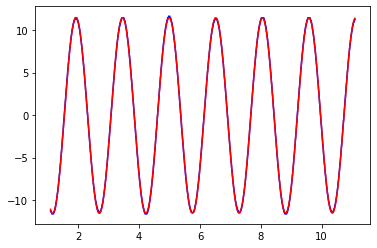

In [141]:
popt, pcov = curve_fit(fitfunc, times2, angles2, p0=[12, 2*np.pi/1.5, 0, 0.1, 0])
plt.plot(times2, angles2, 'b-', label='data')
plt.plot(times2, fitfunc(times2, *popt), 'r-', label='fit')
#print the eqn
print("y = ", popt[0], "*sin(", popt[1], "*t + ", popt[2], ")*exp(-t/", popt[3], ") + ", popt[4])
#calculate chi squared and adjusted chi squared
chi2 = np.sum(((fitfunc(times2, *popt) - angles2)/0.1)**2)
dof = len(times2) - len(popt)
chi2red = chi2/dof
print("chi squared =", chi2)
print("adjusted chi squared =", chi2red)
w = ufloat(popt[1], np.sqrt(pcov[1,1]))

c:\Users\skell\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


y =  12.0 *sin( 4.1887902047863905 *t +  3.141592653589793 )*exp(-t/ 0.001 ) +  0.5445684210538636
chi squared = 26552940.467873685
adjusted chi squared = 6218.48722901023


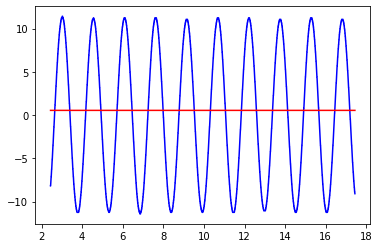

In [142]:
popt,pcov = curve_fit(fitfunc, times3, angles3, p0=[12, 2*np.pi/1.5, np.pi, 0.001, 0])
plt.plot(times3, angles3, 'b-', label='data')
plt.plot(times3, fitfunc(times3, *popt), 'r-', label='fit')
#print the eqn
print("y = ", popt[0], "*sin(", popt[1], "*t + ", popt[2], ")*exp(-t/", popt[3], ") + ", popt[4])
#calculate chi squared and adjusted chi squared
chi2 = np.sum(((fitfunc(times3, *popt) - angles3)/0.1)**2)
dof = len(times3) - len(popt)
chi2red = chi2/dof
print("chi squared =", chi2)
print("adjusted chi squared =", chi2red)

Error with the fit function

c:\Users\skell\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


y =  12.0 *sin( 4.1887902047863905 *t +  0.0 )*exp(-t/ 0.1 ) +  0.07100056769389694
chi squared = 27276827.677599516
adjusted chi squared = 4537.818612144321


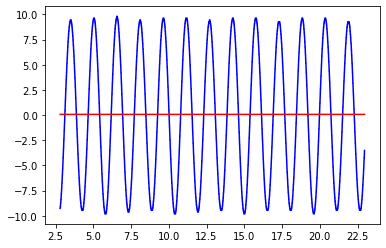

In [143]:
popt, pcov = curve_fit(fitfunc, times4, angles4, p0=[12, 2*np.pi/1.5, 0, 0.1, 0])
plt.plot(times4, angles4, 'b-', label='data')
plt.plot(times4, fitfunc(times4, *popt), 'r-', label='fit')
#print the eqn
print("y = ", popt[0], "*sin(", popt[1], "*t + ", popt[2], ")*exp(-t/", popt[3], ") + ", popt[4])
#calculate chi squared and adjusted chi squared
chi2 = np.sum(((fitfunc(times4, *popt) - angles4)/0.1)**2)
dof = len(times4) - len(popt)
chi2red = chi2/dof
print("chi squared =", chi2)
print("adjusted chi squared =", chi2red)

Error with the fit function

#### 11
The accepted value of g in Kingston is 9.805502389054098 m/s^2

In [144]:
phi = 44.23 * np.pi/180
g = 9.7803267714*(1 + 0.00193185138639*np.sin(phi)**2)/(np.sqrt(1 - 0.00669437999013 * np.sin(phi)**2))
print("g =", g)

g = 9.805502389054098


#### 12
The fits are pretty good as the adjusted $\chi^2$ was 1.1177528292087666 and 1.8883218228639613. It think this means that the fit function is pretty good. 

#### 13
Using $\omega$ = 4.096638069227808, g = 9.9874+/-0.0010.

In [145]:
g = w**2 * I /(M * cm)
print("g =", g, "m/s^2")

g = 9.9874+/-0.0010 m/s^2


#### 14 
Our result does not agree with g. I think that the experiment doesn't agree because of an error in the model. The amplitude fluctuated for each data set which does not agree with the model's exponential decay and could suggest the small angle approximation is not valid.

#### 15
Sensitivity analysis not completed yet.